In [11]:
library(twitteR)
library(stringr)
library(ggplot2)
library(httr)
library(rjson)
library(tm)
library(gridExtra)
library(lubridate)
library(SnowballC)

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:httr’:

    content

The following object is masked from ‘package:ggplot2’:

    annotate


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [35]:
data <- read.table('hashtags.csv', sep="|", header = TRUE)
jobs <- read_csv('data/job.csv')
head(jobs)
head(data)

nw_df <- merge(data, jobs)
head(nw_df)


Parsed with column specification:
cols(
  job_id = col_integer(),
  query = col_character(),
  name = col_character()
)


job_id,query,name
1,q=missouri,missouri
2,q=texas,texas
3,q=california,california
4,q=london,london
5,q=france,france


X,hashtag,job_id,tweet_id_str
0,Redskins,1,8.569068e+17
1,Missouri,1,8.569064e+17
2,roleplay,1,8.569064e+17
3,hotgirl,1,8.569064e+17
4,love,1,8.569064e+17
5,orgazm,1,8.569064e+17


job_id,X,hashtag,tweet_id_str,query,name
1,0,Redskins,8.569068e+17,q=missouri,missouri
1,1,Missouri,8.569064e+17,q=missouri,missouri
1,2,roleplay,8.569064e+17,q=missouri,missouri
1,3,hotgirl,8.569064e+17,q=missouri,missouri
1,4,love,8.569064e+17,q=missouri,missouri
1,5,orgazm,8.569064e+17,q=missouri,missouri


In [46]:
new <- read.csv('tweets1.csv', sep="|")
tweets <- merge(new, jobs)
head(tweets)

job_id,X,created_at,iso_language,source,text,tweet_id_str,query,name
1,0,2017-04-25 16:24:45,en,Twitter Web Client,"#Redskins need to add to their pass rush. Missouri OLB Charles Harris is a good fit: ""I got here by sacking the QB"" https://t.co/pczMsqz509",8.569068e+17,q=missouri,missouri
1,1,2017-04-25 16:24:21,en,Crowdfire - Go Big,Missouri Cowboy Poets Association event - Story https://t.co/gVnymnjRM8&amp; https://t.co/RwEUpgLN34,8.569067e+17,q=missouri,missouri
1,2,2017-04-25 16:24:21,en,Twitter for iPhone,"@bmark5472 @ChrisBragdon @SwolenBrain @ebell_missouri @Ram09221956 @martyfeira @SamMorr83129601 I got called for jury duty, I'm hating today",8.569067e+17,q=missouri,missouri
1,3,2017-04-25 16:24:10,en,dlvr.it,"Lincoln University, State Tech still looking for core cuts https://t.co/ZZ347WIX0j",8.569067e+17,q=missouri,missouri
1,4,2017-04-25 16:24:10,en,Twitter for iPhone,RT @notmagicscience: TEACHERS: Working &amp; RETIRED. Pay ATTENTION Is Missouri’s Teacher Pension Next? https://t.co/mYzIrg48vn,8.569067e+17,q=missouri,missouri
1,5,2017-04-25 16:24:06,en,Twitter for iPhone,RT @kwoodschools: US News and World Report ranked @KirkwoodHS #5 in the state on the 2017 U.S. News Best High School list! Congrats! https:…,8.569067e+17,q=missouri,missouri


In [27]:
mo <- nw_df[nw_df$job_id == 1,]
tx <- nw_df[nw_df$job_id == 2,]
ca <- nw_df[nw_df$job_id == 3,]
london <- nw_df[nw_df$job_id == 4,]
france <- nw_df[nw_df$job_id == 5,]
head(london)

,job_id,X,hashtag,tweet_id_str,query,name
224,4,223,London,8.569069e+17,q=london,london
225,4,224,elrow,8.569068e+17,q=london,london
226,4,225,CoDWWII,8.569068e+17,q=london,london
227,4,226,LondonMarathon,8.569068e+17,q=london,london
228,4,227,Somaliland,8.569068e+17,q=london,london
229,4,228,Canada150,8.569068e+17,q=london,london


In [ ]:
for id in data : 
    MO = data[data$job_id == 1,]

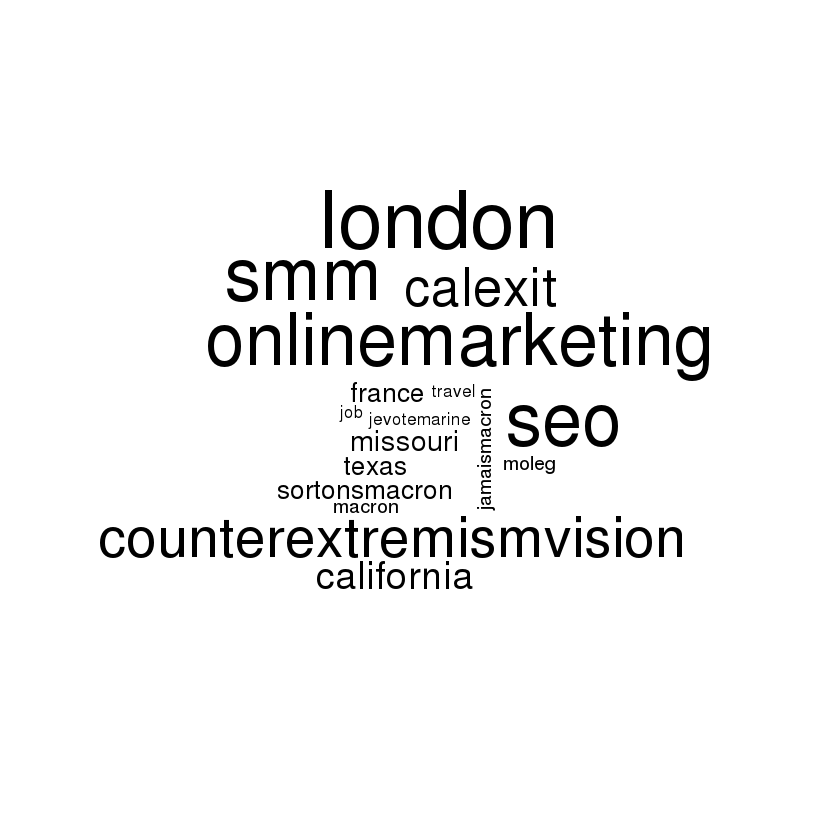

In [76]:
words <- nw_df$hashtag
wordcloud(words)

In [51]:
library(dplyr)
library(tidytext)

words <- mo %>%
  count(name, hashtag, sort = TRUE) %>%
  ungroup()

total_words <- words %>% 
  group_by(hashtag) %>% 
  summarize(total = sum(n))

mo_hash <- left_join(words, total_words)

mo_hash

Joining, by = "hashtag"


name,hashtag,n,total
missouri,Missouri,6,6
missouri,HeartWalkSGF,2,2
missouri,Hiring,2,2
missouri,InTheNews,2,2
missouri,job,2,2
missouri,Kansas,2,2
missouri,missouri,2,2
missouri,MissouriHomeMatters,2,2
missouri,MoLeg,2,2
missouri,NeilGorsuch,2,2


In [30]:
words <- tx %>%
  count(name, hashtag, sort = TRUE) %>%
  ungroup()

total_words <- words %>% 
  group_by(name) %>% 
  summarize(total = sum(n))

tx_hash <- left_join(words, total_words)

tx_hash

Joining, by = "name"


name,hashtag,n,total
texas,Texas,7,42
texas,okstate,2,42
texas,Administrative,1,42
texas,AmericasGP,1,42
texas,bdcnews,1,42
texas,BNEFsummit,1,42
texas,brownsville,1,42
texas,BuildTheWall,1,42
texas,Cats,1,42
texas,companion,1,42


In [31]:
library(dplyr)
library(tidytext)

words <- ca %>%
  count(name, hashtag, sort = TRUE) %>%
  ungroup()

total_words <- words %>% 
  group_by(name) %>% 
  summarize(total = sum(n))

ca_hash <- left_join(words, total_words)

ca_hash

Joining, by = "name"


name,hashtag,n,total
california,CounterExtremismVision,19,122
california,Calexit,18,122
california,California,9,122
california,california,3,122
california,BestHighSchools,2,122
california,education,2,122
california,QueMañana,2,122
california,SanDiego,2,122
california,TheBlackRosesTour,2,122
california,travel,2,122


In [32]:
words <- london %>%
  count(name, hashtag, sort = TRUE) %>%
  ungroup()

total_words <- words %>% 
  group_by(name) %>% 
  summarize(total = sum(n))

london_hash <- left_join(words, total_words)

london_hash

Joining, by = "name"


name,hashtag,n,total
london,London,28,129
london,onlinemarketing,26,129
london,SEO,26,129
london,SMM,26,129
london,CoDWWII,2,129
london,FTSE100,2,129
london,Canada150,1,129
london,CelebratingCancerAllClear,1,129
london,CMU,1,129
london,cocktails,1,129


In [33]:
words <- france %>%
  count(name, hashtag, sort = TRUE) %>%
  ungroup()

total_words <- words %>% 
  group_by(name) %>% 
  summarize(total = sum(n))

france_hash <- left_join(words, total_words)

france_hash

Joining, by = "name"


name,hashtag,n,total
france,France,7,53
france,SortonsMacron,6,53
france,JamaisMacron,4,53
france,Macron,4,53
france,JeVoteMarine,3,53
france,CICE,2,53
france,MarineLePen,2,53
france,Metz,2,53
france,AskChristianAnything,1,53
france,Audiences,1,53


In [63]:
lang <- tweets %>%
  count(name, iso_language, sort = TRUE) %>%
  group_by(iso_language, name) %>% 
  summarize(total = sum(n))

st_lang <- arrange(lang,desc(total))

st_lang

iso_language,name,total
en,missouri,95
en,texas,90
en,california,85
en,london,72
fr,france,68
und,london,28
en,france,26
es,california,10
es,texas,6
und,missouri,4


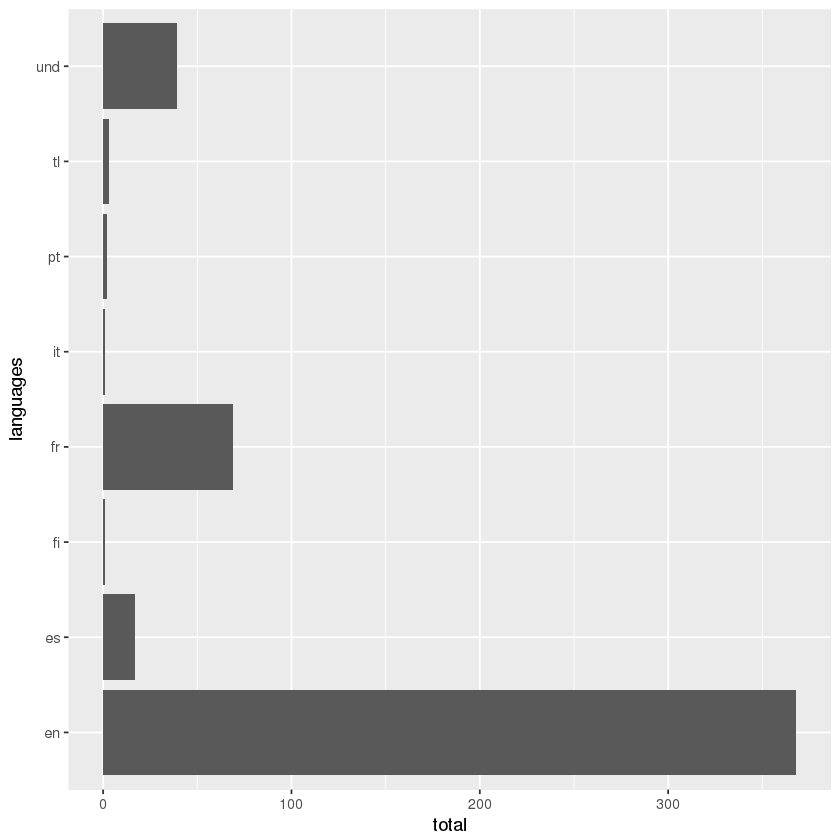

In [64]:
library(ggplot2)

ggplot(st_lang, aes(iso_language, total), col=name) +
  geom_col() +
  labs(x = "languages", y = "total") +
  coord_flip()



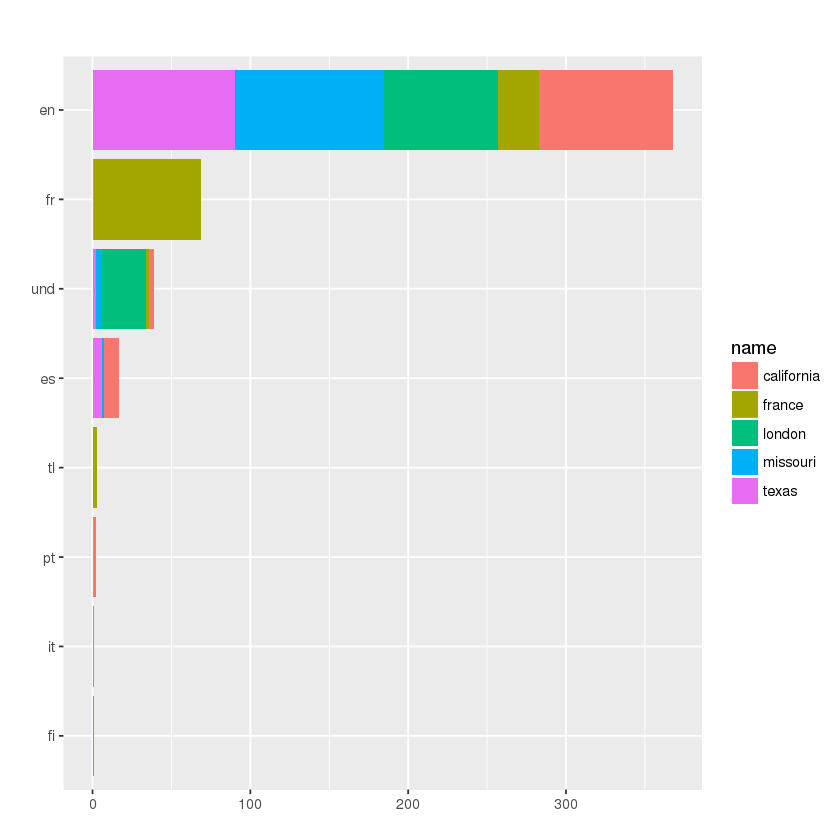

In [70]:
p <- ggplot(st_lang, aes(x = reorder(iso_language, total), y = total, fill=name)) + 
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title=" ", subtitle=" ")+
  labs(x=" ",y=" ") +
  theme(plot.title = element_text(hjust = -1, vjust=1.12)) +
  theme(plot.subtitle = element_text(hjust = -.35)) 

p

In [71]:
library(wordcloud)

Loading required package: RColorBrewer


In [72]:
twitter <- tweets$text


Warning message in wordcloud(twitter):
“missouri could not be fit on page. It will not be plotted.”

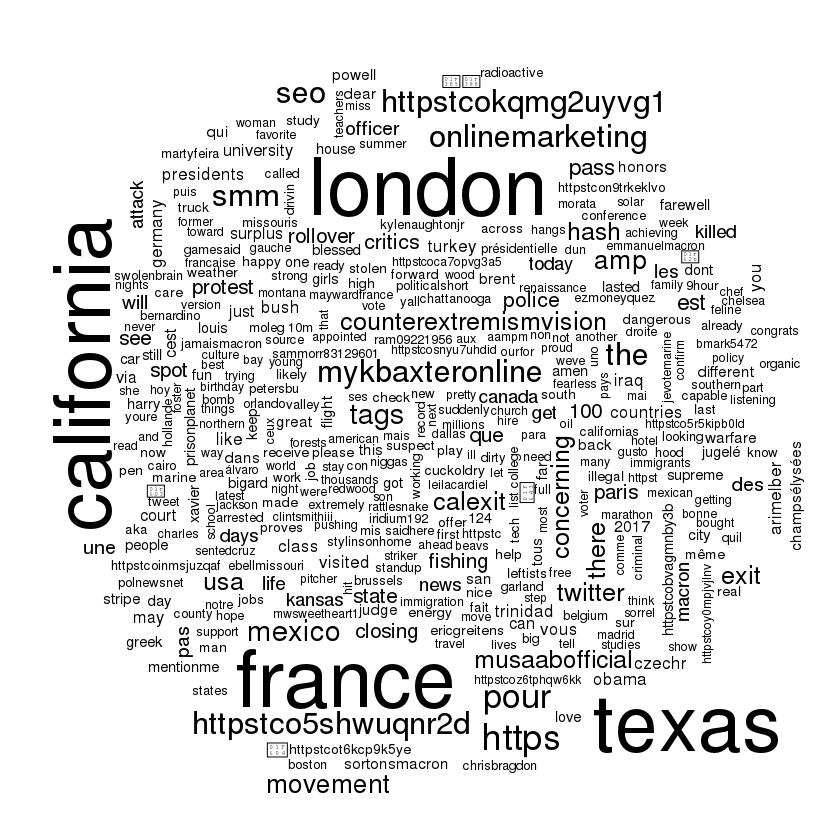

In [73]:
wordcloud(twitter)